In [2]:
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LinearRegression


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


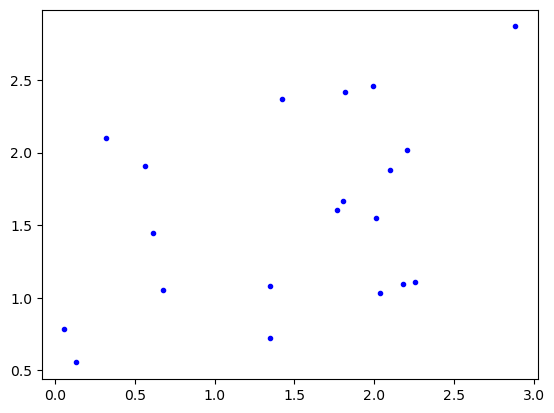

In [8]:
#Data
np.random.seed(2024)
m = 20
X = 3 * np.random.rand(m, 1)
y =1 + 0.5 * X + np.random.randn(m, 1) / 1.5
plt.plot(X, y, "b.")
plt.show()


In [14]:
# Ridge model effects of $\alpha$
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.intercept_, ridge_reg.coef_

(array([1.11476535]), array([[0.31925216]]))

In [23]:
# how to regularize model uing Ridge
# y | X => we want to create x^2, X^3, X^4, X^5, X^6, X^7, X^8, X^9, X^10
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
# ridge_reg for 10th degree polynomial
alph = 1
model = Pipeline([
  ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
  ("std_scaler", StandardScaler()),
  ("ridge_reg", Ridge(alpha=alpha, solver="cholesky"))
])
model.fit(X, y)

# linear regression

model = Pipeline([
  ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
  ("std_scaler", StandardScaler()),
  ("ridge_reg", LinearRegression())
])
model.fit(X, y)

Pipeline(steps=[('poly_features',
                 PolynomialFeatures(degree=10, include_bias=False)),
                ('std_scaler', StandardScaler()),
                ('ridge_reg', LinearRegression())])

In [24]:
X_new = np.linspace(0, 3, 100).reshape(100, 1)
y_new_regul = ridge_model.predict(X_new)
y_new_linear = lin_reg.predict(X_new)

plt.plot(X, y, ".")
plt.plot(X_new, y_new_regul, 'b-',linewwidth=2)
plt.plot(X_new, y_new_linear, 'r-', linewidth=2)
plt.grid()
plt.show()


NameError: name 'ridge_model' is not defined

In [25]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(penalty="l2", alpha=0.1, max_iter=1000, eta0=0.1,random_state=42)
sgd_reg.fit(X, y)
sgd_reg.coef_


c:\Users\Mr.Grumpy\miniconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0.36877028])

In [26]:
sgd_reg.predict([[1.5]])


array([1.64869492])

In [27]:
#Lasso
# Elastic Net**** important
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.59194942])

In [2]:
#homework 3
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.model_selection import train_test_split

iris = load_iris(as_frame=True)
X = iris.frame.drop(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)'], axis=1)
y = iris.target_names[iris.target] == 'virginica'


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

confusion_matrix_default = confusion_matrix(y_test, y_pred)
precision_default = precision_score(y_test, y_pred)
recall_default = recall_score(y_test, y_pred)

print(f"Confusion matrix (default): \n{confusion_matrix_default}")
print(f"Precision (default): {precision_default:.3f}")
print(f"Recall (default): {recall_default:.3f}")

Confusion matrix (default): 
[[32  0]
 [ 0 13]]
Precision (default): 1.000
Recall (default): 1.000


In [5]:
import numpy as np
y_pred_adjusted = np.where(model.predict_proba(X_test)[:, 1] > 0.5, 1, 0)

confusion_matrix_adjusted = confusion_matrix(y_test, y_pred_adjusted)
precision_adjusted = precision_score(y_test, y_pred_adjusted)
recall_adjusted = recall_score(y_test, y_pred_adjusted)

print(f"Confusion matrix (adjusted): \n{confusion_matrix_adjusted}")
print(f"Precision (adjusted): {precision_adjusted:.3f}")
print(f"Recall (adjusted): {recall_adjusted:.3f}")

Confusion matrix (adjusted): 
[[32  0]
 [ 0 13]]
Precision (adjusted): 1.000
Recall (adjusted): 1.000
